In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, 

# Load your dataset
df = pd.read_csv("Google_Stock_Price_Train.csv")  # Use your own file name
data = df['Open'].values.reshape(-1, 1)           # Use 'Open' price column

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Prepare training data
X_train = []
y_train = []

for i in range(60, len(data)):
    X_train.append(data[i-60:i, 0])   # last 60 values
    y_train.append(data[i, 0])        # next value to predict

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # [samples, time_steps, features]

# Build the RNN model
model = Sequential()
# model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(60, 1)))
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.1))

model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))


model.add(SimpleRNN(units=64, activation='tanh', return_sequences=False))
model.add(Dropout(0.1))


# model.add(SimpleRNN(units=64, activation='tanh'))
# model.add(Dropout(0.1))

model.add(Dense(1))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict the stock prices



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_25 (SimpleRNN)       │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_26 (SimpleRNN)       │ (None, 60, 64)         │         7,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_27 (SimpleRNN)       │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,281 (71.41 KB)

 Trainable params: 18,281 (71.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3573
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0745
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0520
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0361
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0255
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0197
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0183
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0157
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0134
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0132
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0103
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0109
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0098
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0096
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0086
Epoc

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


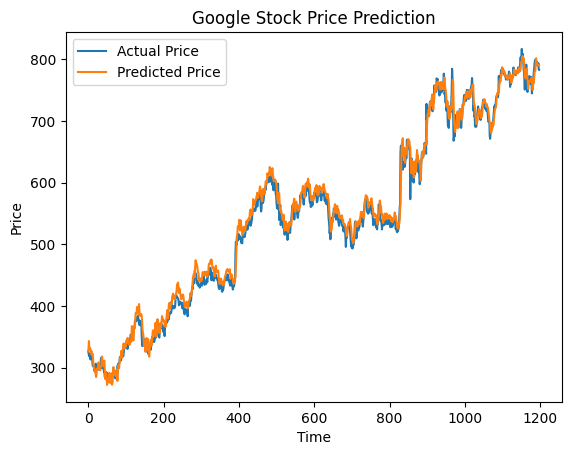

In [ ]:
predicted_prices = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_train.reshape(-1, 1))

# Plot the results
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()




In [43]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 189.97363949118972
Root Mean Squared Error: 13.783092522768237
